In [1]:
#!pip install openpyxl

In [2]:
import math
import random
import numpy as np

# import pandas for structuring the data
import pandas as pd
#from pandas_profiling import ProfileReport
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Other utilities
from sklearn import datasets, preprocessing, metrics

In [3]:
df = pd.read_excel('small-house-data.xlsx')

In [4]:
df.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


In [5]:
df

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680
...,...,...
21608,360000,1530
21609,400000,2310
21610,402101,1020
21611,400000,1600


In [6]:
df.shape

(21613, 2)

In [7]:
df.dtypes

price          int64
sqft_living    int64
dtype: object

In [8]:
df.describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


In [9]:
df.isnull().sum()

price          0
sqft_living    0
dtype: int64

In [10]:
df.price.min()

75000

In [11]:
df.sqft_living.min()

290

In [12]:
df.price.max()

7700000

In [13]:
df.sqft_living.max()

13540

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

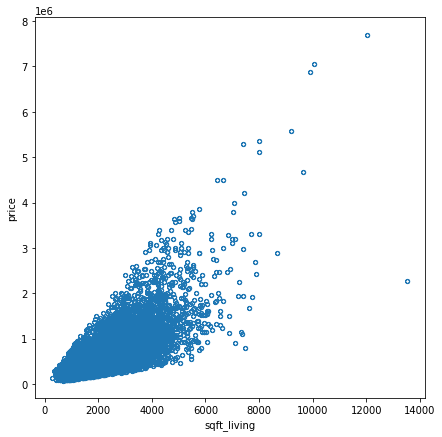

In [14]:
df.plot.scatter(x='sqft_living', y='price', figsize=(7,7), marker = '$\u25EF$')

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

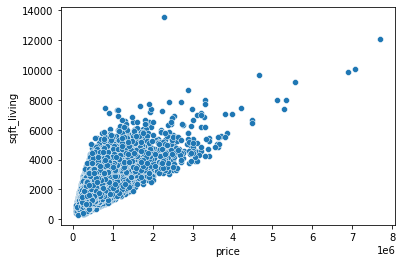

In [15]:
sns.scatterplot(x=df.price, y=df.sqft_living)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

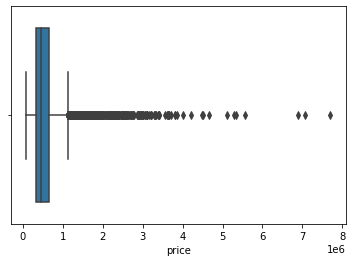

In [16]:
sns.boxplot(df['price'])

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

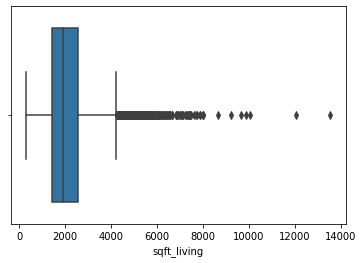

In [17]:
sns.boxplot(df['sqft_living'])

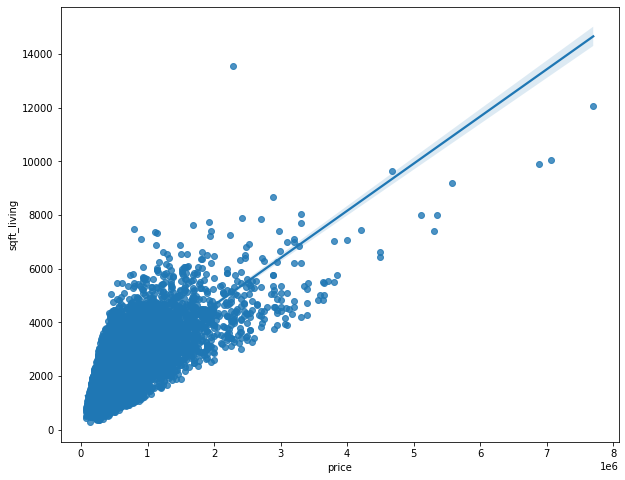

In [45]:
plt.figure(figsize=(10,8))
ax = sns.regplot(x="price", y="sqft_living", data=df)

In [25]:
coormat = df.corr()
coormat

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

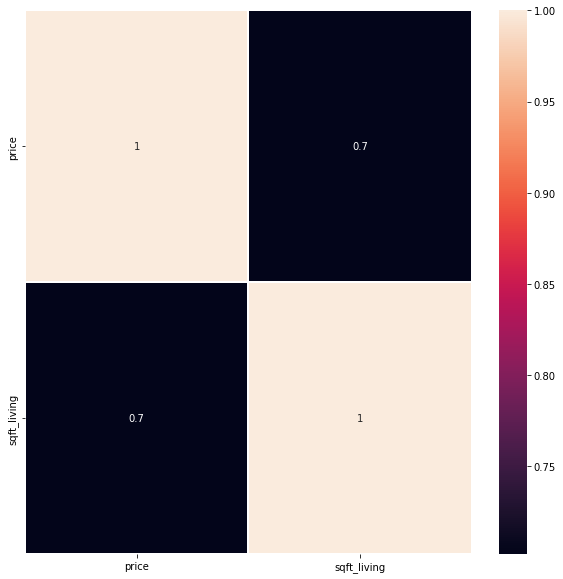

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(coormat, annot=True, linewidths=.1)
plt.show

In [28]:
(df == 0).sum(axis=0)

price          0
sqft_living    0
dtype: int64

In [29]:
(df < 10000000).sum(axis=0)

price          21613
sqft_living    21613
dtype: int64

***

In [32]:
# Predicted price for houses

def pprice(x: float, a: float, b: float) -> float:
    return (b*x + a)

In [105]:
#RSS - Residual Sum of Squares
def sum_err(a: float, b:float, x:Vector, y:Vector)->float:
    return sum(error(a, b, xi, yi)**2
    for xi, yi in zip(x, y))

In [47]:
# The error

def error(a: float, b: float, x: float, y: float) -> float:
    return y - pprice(a, b, x)

In [154]:
# sqr_ft

x = df['sqft_living'].values
#x

In [155]:
# price

y = df['price'].values
#y

In [148]:
#sqft
#x = df.iloc[: , 1:]

x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [149]:
# price
#y = df.iloc[: , 0:1]

y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [156]:
#OLS - Ordinary Least Squares

from numpy import mean
from numpy import std
from numpy import cov
from typing import List, Tuple
from scipy.stats import pearsonr

Vector = List[float]
 
def least_sq(x:Vector, y:Vector) -> Tuple[float, float]:
    #r = pearsonr(x,y)
    r = cov(x,y)/(std(x)*std(y))
    b = r*(std(y)/std(x))
    a = mean(y) - b * mean(x)
    return a, b

In [157]:
a, b = least_sq(x,y)

In [158]:
a, b

(array([[ 5.38008146e+05, -4.36077498e+04],
        [-4.36077498e+04, -3.31807998e+08]]),
 array([[1.00004627e+00, 2.80636553e+02],
        [2.80636553e+02, 1.59790436e+05]]))

In [159]:
sum_err(a,b, x, y)

array([[3.23083354e+22, 2.15037573e+20],
       [2.15037573e+20, 1.23008728e+28]])

In [160]:
x = [3, 6, 4, 5]
y = [0, -3, -1, -2]

def predict(b: float, a: float, x: float)-> float:
    return b * x + a

In [ ]:
predict(3,)